In [20]:
# Adjusted example from:
# https://realpython.com/ggplot-python/#scales-change-data-scale-according-to-its-meaning

from plotnine.data import economics
from plotnine import ggplot, aes, scale_x_timedelta, labs, geom_line
from datetime import datetime

import pandas as pd

t1 = datetime.strptime('25/03/09 16:31:32.123', '%d/%m/%y %H:%M:%S.%f')
t2 = datetime.strptime('25/03/09 16:31:32.500', '%d/%m/%y %H:%M:%S.%f')
t3 = datetime.strptime('25/03/09 16:31:33.300', '%d/%m/%y %H:%M:%S.%f')
t4 = datetime.strptime('25/03/09 16:31:33.800', '%d/%m/%y %H:%M:%S.%f')
t5 = datetime.strptime('25/03/09 16:31:34.200', '%d/%m/%y %H:%M:%S.%f')

dt = [t1, t2, t3, t4, t5]
economics_subset = economics.head(5)
economics_subset.insert(1, "datetime", dt, True)

economics_subset.head()

,date,datetime,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,2009-03-25 16:31:32.123,507.4,198712,12.5,4.5,2944
1,1967-08-01,2009-03-25 16:31:32.500,510.5,198911,12.5,4.7,2945
2,1967-09-01,2009-03-25 16:31:33.300,516.3,199113,11.7,4.6,2958
3,1967-10-01,2009-03-25 16:31:33.800,512.9,199311,12.5,4.9,3143
4,1967-11-01,2009-03-25 16:31:34.200,518.1,199498,12.5,4.7,3066


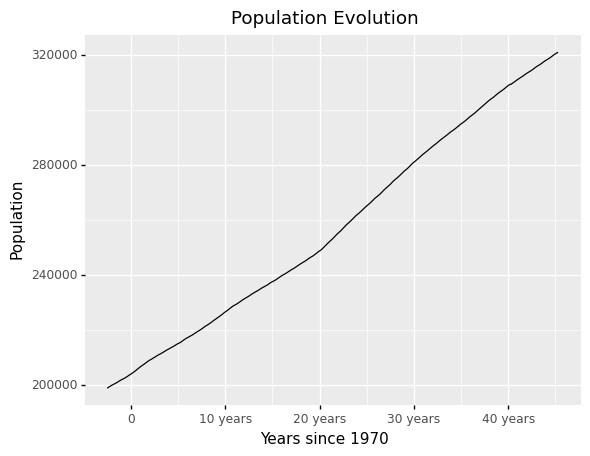

<ggplot: (309730009)>

In [7]:
# Working example with full dataset and dates without time
(
    ggplot(economics)
    + aes(x="date", y="pop")
    + scale_x_timedelta(name="Years since 1970")
    + labs(title="Population Evolution", y="Population")
    + geom_line()
)

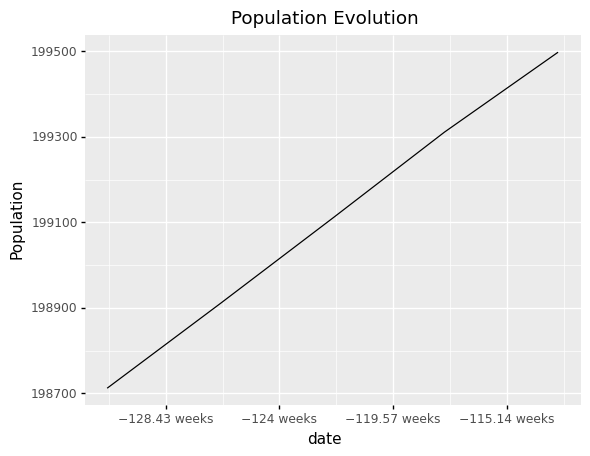

<ggplot: (309967897)>

In [28]:
# Broken example with partial dataset, dates without time, even if re-sorted by date
# There is a StackOverflow post mentining that some tricks might be required to specify breaks:
# https://stackoverflow.com/questions/54678274/how-to-scale-x-axis-with-intervals-of-1-hour-with-x-data-type-being-timedelta64
economics_subset_sorted = economics_subset.sort_values(by=['datetime'], ascending=True)

b1 = datetime.strptime('25/03/09 16:31:32.000', '%d/%m/%y %H:%M:%S.%f')
b2 = datetime.strptime('25/03/09 16:31:33.000', '%d/%m/%y %H:%M:%S.%f')
b3 = datetime.strptime('25/03/09 16:31:34.000', '%d/%m/%y %H:%M:%S.%f')
b4 = datetime.strptime('25/03/09 16:31:35.000', '%d/%m/%y %H:%M:%S.%f')

manual_breaks=[b1, b2, b3, b4]

(
    ggplot(economics_subset)
    + aes(x="date", y="pop")
    + scale_x_timedelta(
        # breaks=manual_breaks
        # name="Months since 1967",
        # breaks=lambda x: pd.to_timedelta(
        #     pd.Series(range(0, 10)),
        # unit='h'
        # )
    )
    + labs(title="Population Evolution", y="Population")
    + geom_line()
)